<a href="https://colab.research.google.com/github/gwon0919/ML/blob/main/tfc29character.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 글자 단위 텍스트 생성 모델 작성
filename = 'engdata.txt'

# et = open(filename, encoding='utf-8').read().lower()
# print(et)

# 드라이브 마운트된 파일 읽기
with open('/content/drive/MyDrive/Myfolder/engdata.txt', 'r', encoding='utf-8') as f:
  et = f.read().lower()
  print(et)

# 문자 인덱싱
chars = sorted(list(set(et)))
print(chars)
char_to_int = dict((c, i) for i,c in enumerate(chars))
print(char_to_int)

n_chars = len(et)
n_vocab = len(chars)
print('전체 글자 수 :', n_chars)
print('전체 어휘 크기 :', n_vocab)

seq_length = 50   # 학습할 문자를 해당 숫자 개씩 끊어서 만들기
datax = []
datay = []

for i in range(0,n_chars - seq_length, 1):
  seq_in = et[i:i+seq_length]
  seq_out = et[i+seq_length]
  # print(seq_in, ' : ', seq_out) # ello tom,   :  a
  datax.append([char_to_int[char] for char in seq_in])
  datay.append(char_to_int[seq_out])

print(datax)
print(datay)

datax_pattern = len(datax)
print('datax_pattern 행렬 유형 수 :', datax_pattern)

# datax 구조 변경
import numpy as np
feature = np.reshape(datax, (datax_pattern, seq_length, 1))
print(feature[:1], feature.shape)

feature = feature / float(n_vocab)  # 전체 글자수로 정규화
print(feature[:1])

from keras.utils import to_categorical
label = to_categorical(datay)
print(label[:1])

sam altman’s dismissal and rapid reinstatement as ceo of openai, the creator of chatgpt, confirms that the future of ai is firmly in the hands of people focused on speed and profits, at the expense of all else. this elite will now impose their vision for technology on the rest of humanity. most of us will not enjoy the consequences.
the founders of openai claimed to be creating a philanthropic organization that would benefit all of humanity or at least protect it from potential harm. openai is ostensibly a nonprofit, and had a small board made up of academics and experts -- and notably, did not include investors. we may never know what really happened on nov. 17, when the board fired altman, but the most likely interpretation is that members of this board were troubled by altman’s commercial emphasis and the headlong rush to develop new, powerful models of generative artificial intelligence.
it is encouraging to think there are still people in silicon valley who worry about guardrails 

In [ ]:
# model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import sys
import matplotlib.pyplot as plt

model = Sequential()    # 글자 단위는 Embedding 레이어 없다.
model.add(LSTM(units=256, input_shape=(feature.shape[1], feature.shape[2]), activation='tanh', return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=256, activation='tanh'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=label.shape[1], activation='softmax'))
print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

chkPoint = ModelCheckpoint('tfc29model.hdf5', monitor='loss', verbose=0, save_best_only=True, mode='min')
es = EarlyStopping(monitor='loss', patience=10)
history = model.fit(feature, label, batch_size=8, epochs=500, verbose=2, callbacks=[es, chkPoint])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 256)           264192    
                                                                 
 dropout_2 (Dropout)         (None, 50, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 39)                10023     
                                                                 
Total params: 799527 (3.05 MB)
Trainable params: 799527 (3.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/500
2

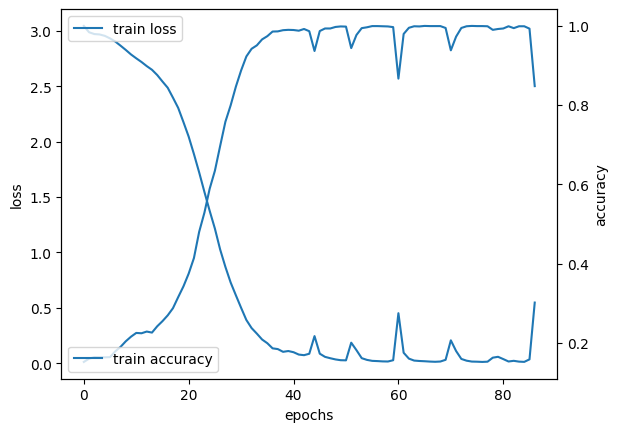

In [ ]:
fig, loss_ax = plt. subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], label='train loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], label='train accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()


In [ ]:
print('문장 작성-------------')
int_to_char = dict((i,c) for i,c in enumerate(chars))
print('int_to_char: ', int_to_char)

start = np.random.randint(0, len(datax)- 1)
pattern = datax[start]
print('pattern : ', pattern)

print('seed : ')
print("\"",''.join([int_to_char[value] for value in pattern]) ,"\"")   # hello tom
print()
for i in range(500):  # 글자 500개로 문장 생성
  x = np.reshape(pattern,(1, len(pattern), 1))
  x = x / float(n_vocab)
  pred = model.predict(x, verbose=0)
  # print(pred)
  index = np.argmax(pred)
  result = int_to_char[index]    # 인덱스 번째 문자를 얻을 수 있다.
  # seq_in = [int_to_char[value] for value in pattern]
  # print(result)
  sys.stdout.write(result)
  pattern.append(index)    # 예측된 글자를 누적
  pattern = pattern[1:len(pattern)]

print('종료')

문장 작성-------------
int_to_char:  {0: '\n', 1: ' ', 2: '$', 3: ',', 4: '-', 5: '.', 6: '0', 7: '1', 8: '7', 9: ':', 10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j', 20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't', 30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z', 36: '’', 37: '“', 38: '”'}
pattern :  [14, 21, 34, 1, 29, 24, 1, 11, 14, 1, 22, 24, 27, 14, 1, 28, 34, 22, 25, 10, 29, 17, 14, 29, 18, 12, 1, 29, 24, 1, 24, 25, 14, 23, 10, 18, 1, 28, 12, 10, 21, 18, 23, 16, 1, 30, 25, 1, 10, 28]
seed : 
" ely to be more sympathetic to openai scaling up as "

 fast as possible, regardless of the consequences. thes recklessness is driven by the profit motive, turbocharged by venture capital, in which the most money flows to products and services that grow fastrs, eud aotman crisis: hire the talent, promise them unlimited money to spend, and press the pedal to the metal.iy the meaal thating  au the looe somp io 